<a href="https://colab.research.google.com/github/Anisha-Tasneem/Customer-Segmentation-and-Data-Analysis-using-Social-Media/blob/main/Test%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/499B-datasets/Dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Drop any rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'City Code', 'Product Code']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the data into features and target variable
X = data.drop(['Customer ID', 'Customer Value'], axis=1)  # Features
y = data['Customer Value']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3998, 5)
Shape of X_test: (1000, 5)
Shape of y_train: (3998,)
Shape of y_test: (1000,)


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Extracting the categorical columns
categorical_cols = ['Gender', 'City Code']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = encoder.fit_transform(data[categorical_cols])

# Dropping columns not suitable for modeling
data_processed = data.drop(columns=['Gender', 'City Code', 'Product Code'])

#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_processed['Customer Value'])

#Droping original 'Customer Value' column from the processed data
data_processed.drop(columns=['Customer Value'], inplace=True)

#Concatenating encoded categorical variables with remaining numerical variables
X = np.concatenate((data_processed.values, X_encoded), axis=1)
y = y_encoded

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Training random forest model
history = rf_classifier.fit(X_train, y_train)

#Predicting on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.618


In [4]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       688
           1       0.29      0.15      0.20       312

    accuracy                           0.62      1000
   macro avg       0.48      0.49      0.47      1000
weighted avg       0.56      0.62      0.58      1000



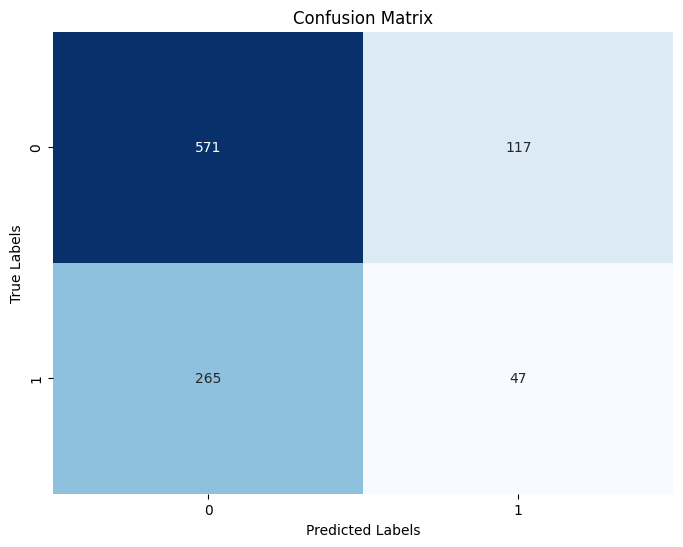

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

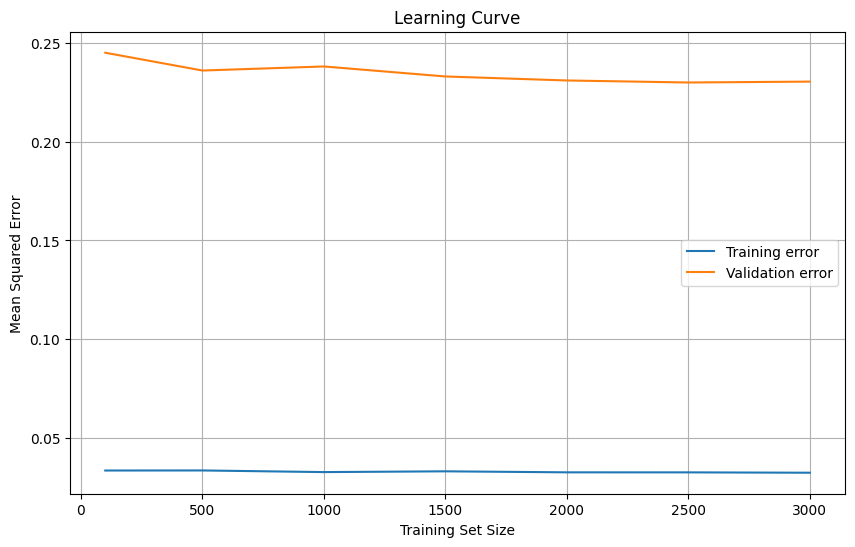

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor


def plot_learning_curve(estimator, X, y, train_sizes, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error')

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')

    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define different training set sizes
train_sizes = [100, 500, 1000, 1500, 2000, 2500, 3000]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Plot the learning curve
plot_learning_curve(rf_regressor, X_train, y_train, train_sizes)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier()

# Fit the model to some data
model.fit(X_train, y_train)

# Get the model summary
model_summary = model.get_params()

# Print the model summary
print(model_summary)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

# Assuming the data preprocessing and model training steps are the same as before

# Define the categorical columns
categorical_cols = ['Gender', 'City Code']

# Modify the encoder to handle unknown categories
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')

# One-hot encode categorical variables
X_encoded = encoder.fit_transform(data[categorical_cols])

# Save the column names of the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Dropping columns not suitable for modeling
data_processed = data.drop(columns=['Gender', 'City Code', 'Product Code'])

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_processed['Customer Value'])

# Dropping original 'Customer Value' column from the processed data
data_processed.drop(columns=['Customer Value'], inplace=True)

# Concatenating encoded categorical variables with remaining numerical variables
X = np.concatenate((data_processed.values, X_encoded), axis=1)
y = y_encoded

# Store the final column names used for training
final_feature_names = list(data_processed.columns) + list(encoded_feature_names)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training random forest model
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Predict probabilities for the test set
y_prob = rf_classifier.predict_proba(X_test)[:, 1]


# Define a preprocessing function for new input data
def preprocess_input(new_data, encoder, final_feature_names, categorical_cols):
    # Encode the categorical columns using the existing encoder
    X_encoded = encoder.transform(new_data[categorical_cols])

    # Convert encoded array back to DataFrame
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop the original categorical columns and concatenate encoded ones
    new_data_processed = new_data.drop(columns=categorical_cols + ['Product Code'])

    # Concatenate the processed numerical data with the encoded categorical data
    X_new = pd.concat([new_data_processed.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

    # Ensure the columns match the training data
    X_new = X_new.reindex(columns=final_feature_names, fill_value=0)

    return X_new.values

# Define a prediction function
def predict_customer_value(new_data, encoder, model, final_feature_names, categorical_cols):
    X_new = preprocess_input(new_data, encoder, final_feature_names, categorical_cols)
    predictions = model.predict(X_new)
    predicted_labels = label_encoder.inverse_transform(predictions)
    return predicted_labels


# Example of new input data
new_data = pd.DataFrame({
    'Customer ID': [1],       # Replace with actual new data
    'Age': [19],              # Replace with actual new data
    'Gender': ['Female'],     # Replace with actual new data
    'City Code': ['3'],       # Replace with actual new data
    'Product Code': ['9'],    # Replace with actual new data
    'Total Bill (Taka)': ['9120']  # Replace with actual new data
})

# Drop 'Customer ID' column from the new input data
new_data.drop(columns=['Customer ID'], inplace=True)

# Make prediction on new input data
predicted_value = predict_customer_value(new_data, encoder, rf_classifier, final_feature_names, categorical_cols)


# Print input Total Bill (Taka) and output Customer Value
print("Input Total Bill (Taka):", new_data['Total Bill (Taka)'].values[0])
print("Output Customer Value:", predicted_value[0])  # Assuming predicted_value is an array

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.618
Input Total Bill (Taka): 9120
Output Customer Value: 1


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [22]:
# Define a prediction function with printing "High" or "Low"
def predict_customer_value_with_label(new_data, encoder, model, final_feature_names, categorical_cols):
    X_new = preprocess_input(new_data, encoder, final_feature_names, categorical_cols)
    predictions = model.predict(X_new)
    if predictions[0] == 1:
        print("Output Customer Value: High")
    else:
        print("Output Customer Value: Low")

# Example of new input data
new_data = pd.DataFrame({
    'Customer ID': [1],       # Replace with actual new data
    'Age': [19],              # Replace with actual new data
    'Gender': ['Female'],     # Replace with actual new data
    'City Code': ['3'],       # Replace with actual new data
    'Product Code': ['9'],    # Replace with actual new data
    'Total Bill (Taka)': ['9120']  # Replace with actual new data
})

# Drop 'Customer ID' column from the new input data
new_data.drop(columns=['Customer ID'], inplace=True)

# Make prediction on new input data with label printing
predict_customer_value_with_label(new_data, encoder, rf_classifier, final_feature_names, categorical_cols)

Output Customer Value: High


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

# Assuming the data preprocessing and model training steps are the same as before

# Define the categorical columns
categorical_cols = ['Gender', 'City Code']

# Modify the encoder to handle unknown categories
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')

# One-hot encode categorical variables
X_encoded = encoder.fit_transform(data[categorical_cols])

# Save the column names of the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Dropping columns not suitable for modeling
data_processed = data.drop(columns=['Gender', 'City Code', 'Product Code'])

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_processed['Customer Value'])

# Dropping original 'Customer Value' column from the processed data
data_processed.drop(columns=['Customer Value'], inplace=True)

# Concatenating encoded categorical variables with remaining numerical variables
X = np.concatenate((data_processed.values, X_encoded), axis=1)
y = y_encoded

# Store the final column names used for training
final_feature_names = list(data_processed.columns) + list(encoded_feature_names)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training random forest model
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define a preprocessing function for new input data
def preprocess_input(new_data, encoder, final_feature_names, categorical_cols):
    # Encode the categorical columns using the existing encoder
    X_encoded = encoder.transform(new_data[categorical_cols])

    # Convert encoded array back to DataFrame
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop the original categorical columns and concatenate encoded ones
    new_data_processed = new_data.drop(columns=categorical_cols + ['Product Code'])

    # Concatenate the processed numerical data with the encoded categorical data
    X_new = pd.concat([new_data_processed.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

    # Ensure the columns match the training data
    X_new = X_new.reindex(columns=final_feature_names, fill_value=0)

    return X_new.values

# Define a prediction function with labeled output
def predict_customer_value_with_label(new_data, encoder, model, final_feature_names, categorical_cols):
    X_new = preprocess_input(new_data, encoder, final_feature_names, categorical_cols)
    predictions = model.predict(X_new)
    predicted_value = predictions[0]
    predicted_label = "High" if predicted_value == 1 else "Low"

    # Print input Total Bill (Taka) and output Customer Value
    print("Input Total Bill (Taka):", new_data['Total Bill (Taka)'].values[0])
    print("Output Customer Value:", predicted_value, "=", predicted_label)

# Example of new input data
new_data = pd.DataFrame({
    'Customer ID': [1],       # Replace with actual new data
    'Age': [19],              # Replace with actual new data
    'Gender': ['Female'],     # Replace with actual new data
    'City Code': ['3'],       # Replace with actual new data
    'Product Code': ['9'],    # Replace with actual new data
    'Total Bill (Taka)': ['9120']  # Replace with actual new data
})

# Drop 'Customer ID' column from the new input data
new_data.drop(columns=['Customer ID'], inplace=True)

# Make prediction on new input data with labeled output
predict_customer_value_with_label(new_data, encoder, rf_classifier, final_feature_names, categorical_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.618
Input Total Bill (Taka): 9120
Output Customer Value: 1 = High


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
